## Importing Packages

In [1]:
#Installing all packages
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install library

In [2]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Importing Data

In [5]:
# the supplied CSV data file is in the directory
insurance_data= pd.read_csv('insurance.csv')

In [6]:
#Calling the info method on insurance_data to see a summary of the data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data appears to have no missing values as all non-null counts are 1338 entriees and all columns have 1338 entries.
All Dtypes appear to represent the data correctly. 

In [61]:
#Call the head method on insurance_data to print the first several rows of the data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


All columns have had heading transfered correctly and all data looks organized. 

## Determining if their are Duplicates

In [15]:
#determining the number of duplicate rows
print(f"Duplicate rows: {insurance_data.duplicated().sum()}")
#Droping duplicate rows
insurance_data.drop_duplicates(inplace=True)
#insuraning there are no more duplicates
print(f"Duplicate rows: {insurance_data.duplicated().sum()}")

Duplicate rows: 1
Duplicate rows: 0


## Exploring the Data

In [18]:
#To be thought, the missing values will be counted. 
#Using count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#insurance_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Ordering them (increasing or decreasing) using sort_values
#Calling `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([insurance_data.isnull().sum(), 100 * insurance_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


Indeed no missing values are seen. 

In [21]:
#Using insurance_data`s select_dtypes` method to select columns of dtype 'object' to investigate the
#categorical variables
insurance_data.select_dtypes('object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [23]:
#Use pandas' Series method `value_counts` to find number of each regions
insurance_data['region'].value_counts().head()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

It is interesting to note that there are more values from the southeastern region than any other region. 

In [26]:
#Use pandas' Series method `value_counts` to find number of each sex
insurance_data['sex'].value_counts().head()

sex
male      675
female    662
Name: count, dtype: int64

There are more male individuals than female individuals 

In [29]:
#Use pandas' Series method `value_counts` to find number of each smoker
insurance_data['smoker'].value_counts().head()

smoker
no     1063
yes     274
Name: count, dtype: int64

Way more individuals are not smokers than smokers. This is not unusual because as of 2022 only 11.6% of people in the united states are smokers. So, it is not surprising to see a low number of people are smokers in out 1338 cases. 

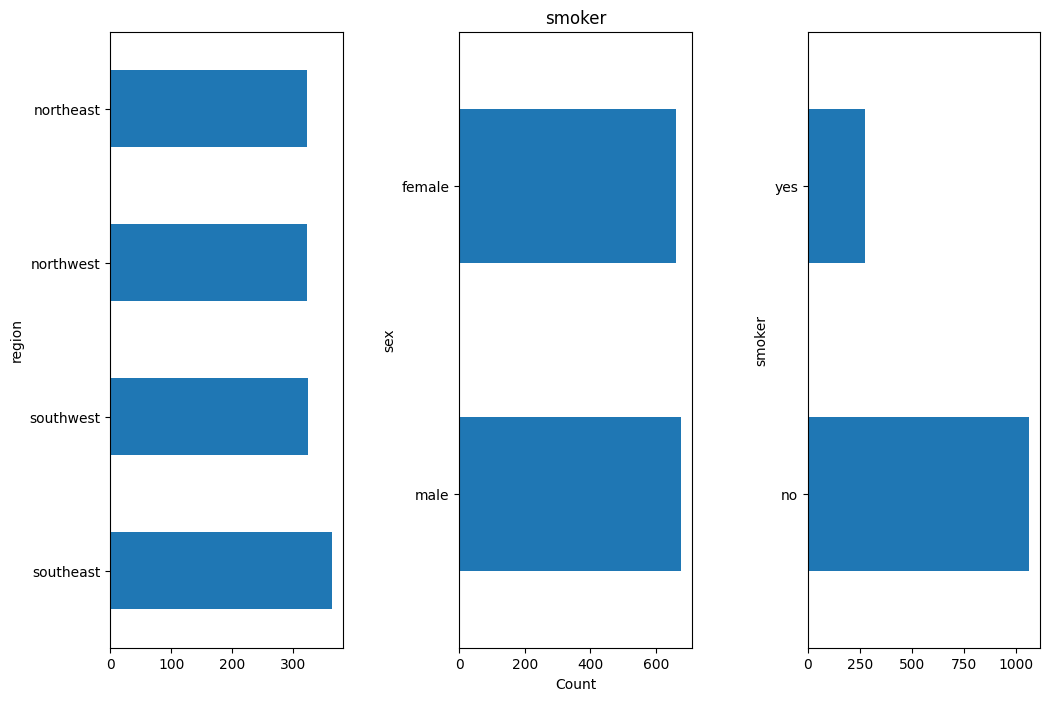

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
insurance_data.region.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title
ax[1].set_title('region')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
insurance_data.sex.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title
ax[1].set_title('sex')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
insurance_data.smoker.value_counts().plot(kind='barh', ax=ax[2])
#Give the plot a helpful title
ax[1].set_title('smoker')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

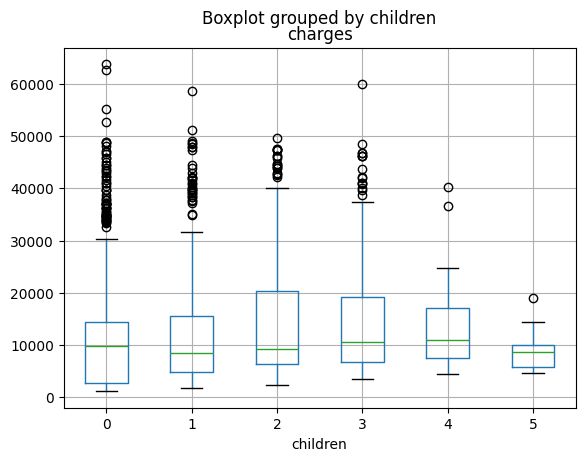

In [34]:
#Looking at the range of data based on number of children
insurance_data.boxplot(column='charges', by='children')

# Display the plot
plt.show()

The Interquartile ranges of each boxplot is based around the same values, but you do see more outliers with those individuals with no children. This maybe those with no children are more able to spend more money on health care. 

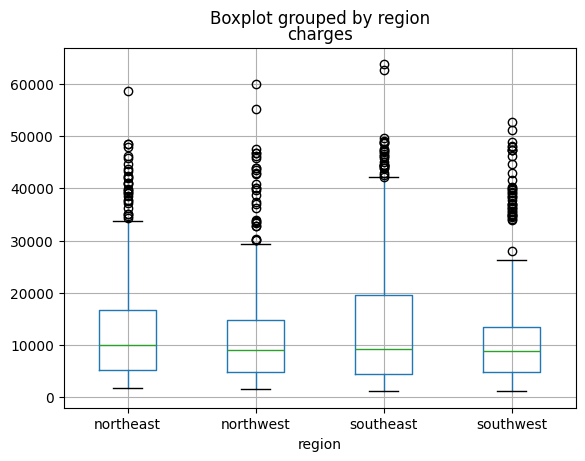

In [37]:
#Looking at the range of data based on number of region
insurance_data.boxplot(column='charges', by='region')

# Display the plot
plt.show()

All values seem to be arranged relatively the same over each region. 

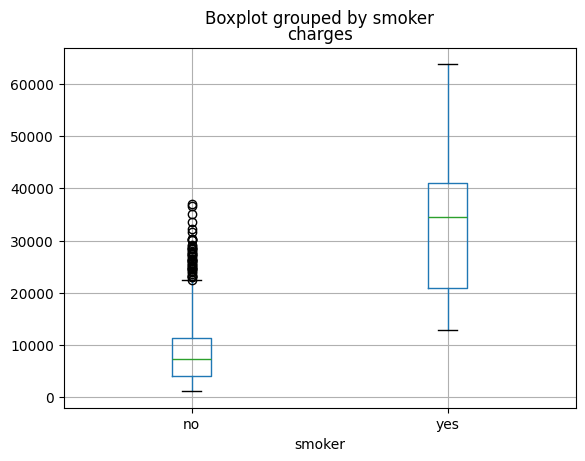

In [40]:
#Looking at the range of data based on number of smoker
insurance_data.boxplot(column='charges', by='smoker')

# Display the plot
plt.show()

The interquartile range of smokers is much higher than non smokers. Although there are outliers of those that are not smokers. This makes sense because smoking leads to more health problems thus increased charges. 

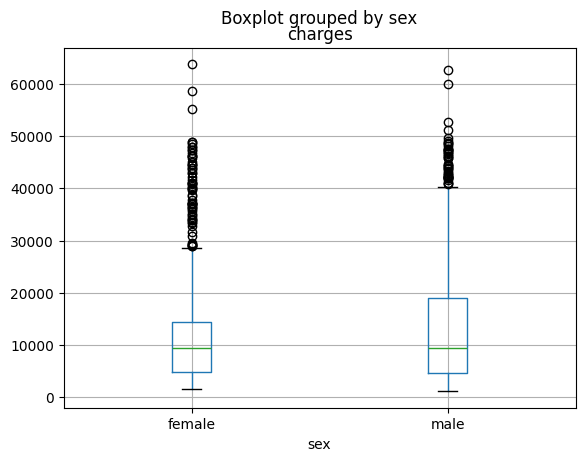

In [43]:
#Looking at the range of data based on number of sex
insurance_data.boxplot(column='charges', by='sex')

# Display the plot
plt.show()

There does not appear to be a difference based on sex. 

In [46]:
#describeing charges data
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


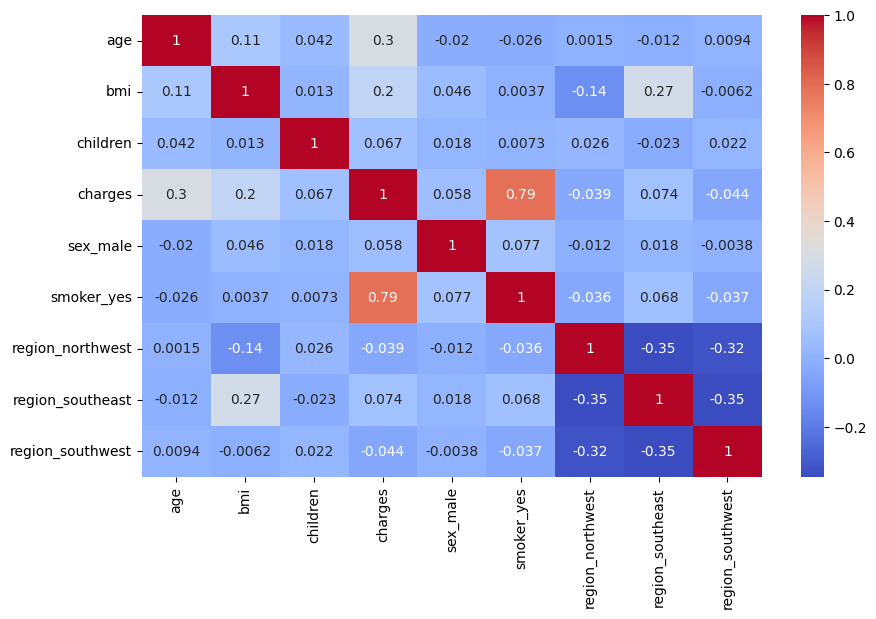

In [48]:
#creating a heatmap to understand correlation of each
#Creating bool's for the vairables such that I can create a heatmap.
insurance_data_B = pd.get_dummies(insurance_data, drop_first=True)
plt.figure(figsize=(10, 6))
sns.heatmap(insurance_data_B.corr(), annot=True, cmap='coolwarm')  # Correlation heatmap
plt.show()

Heatmap appears to show the greatest correlation is between if the individual is a smoker or not. This correlates with the boxplot seen before. 

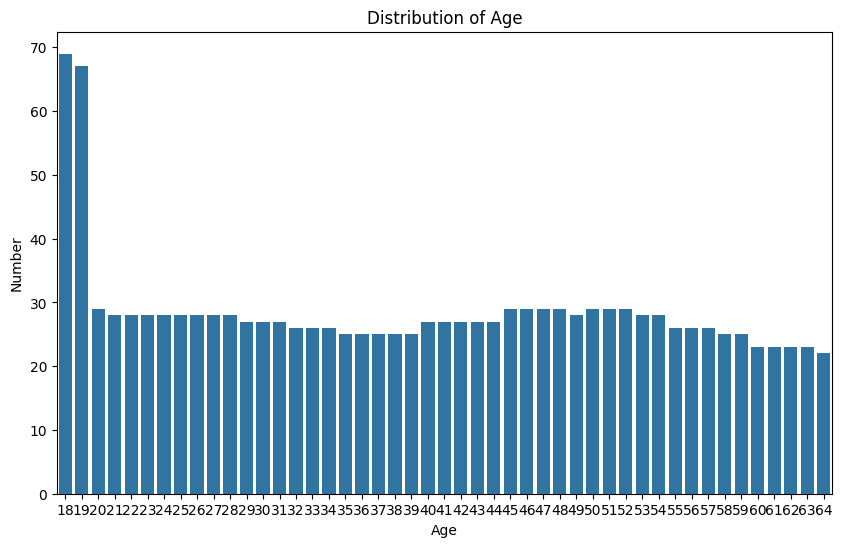

In [54]:
#Creating bargraph the number of individuals at each age
age_counts = insurance_data['age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Number']

plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Number', data=age_counts)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

Data show that most individuals in the data set are 18/19 year olds. 

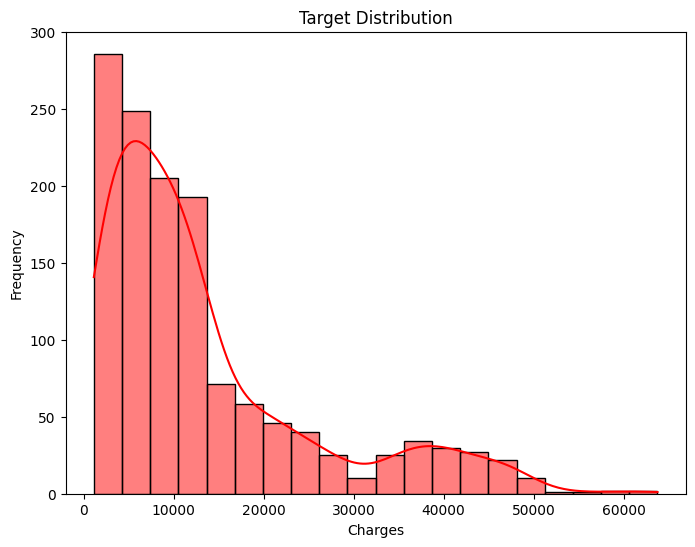

In [57]:
#graphing to show the distribution of the charges
plt.figure(figsize=(8,6))
sns.histplot(insurance_data['charges'],bins=20,color='red',edgecolor='black',kde=True)
plt.title('Target Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

Graph shows most of the charges below 12000. 

In [63]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
#Saving the data to new file
insurance_data.to_csv("cleaned_Medical_Cost_Personal_Datasets.csv", index=False)